# TP Clustering

In [13]:
from sklearn import cluster
from scipy.io import arff
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random

## 1 Jeux de données
Les jeux de données sont disponibles sur le site : https://github.com/deric/clustering-benchmark.
Seuls les jeux de données "artificiels" seront considérés dans ces TP.

In [80]:
fileTestName = "2d-10c.arff"

#colors = ['r','b','y','g', 'lime', 'bisque', 'lightcoral', 'mediumturquoise', 'sandybrown', 'black']
#colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(100)]

nbClusters = 9

def load_file(filepath):
    return arff.loadarff(open(filepath, 'r'))

data = load_file("./artificial/"+fileTestName)[0]

In [81]:
new_data = []
x_list = []
y_list = []
z_list = []
for (x,y,_) in data : 
    new_data.append([x,y])
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)

In [82]:
kmeans = cluster.KMeans(n_clusters=nbClusters, init='k-means++').fit(new_data)
labels = kmeans.labels_

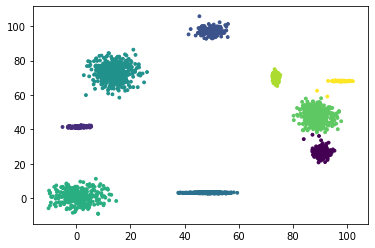

In [83]:
#for (x,y,_) in zip(x_list, y_list, kmeans.labels_):
    #plt.plot(x, y,'o',color=colors[c])    
#plt.plot(x_list, y_list,'o',color=colors[indexColor])

plt.scatter(x_list, y_list, c=labels,s=8)
plt.show()

Identifiez pour cela dans la documentation de scikitlearn 1 les métriques qui vous semblent
pertinentes.https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [84]:
i_max = -1
score_max = 0
starttime = time.time()

for i in range(2,10) :
    data_temp = new_data;
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++').fit(data_temp)
    labels = kmeans.labels_
    score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
    if score > score_max :
        i_max = i
        score_max = score

endtime = time.time()
print("Best cluster number : ",i_max," Best score : ",score_max)
print("Runtime : ", round((endtime - starttime)*1000,2),"ms")

Best cluster number :  9  Best score :  0.8377446510558256
Runtime :  1773.25 ms


# 2 Clustering k-Means

In [75]:
def kMeans(fileTestName):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    i_max = 0
    score_max = 0
    starttime = time.time()

    for i in range(2,50) :
        data_temp = new_data;
        kmeans = cluster.KMeans(n_clusters=i, init='k-means++').fit(data_temp)
        labels = kmeans.labels_
        score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
        if score > score_max :
            i_max = i
            score_max = score
    endtime = time.time()
    
    kmeans = cluster.KMeans(n_clusters=i_max, init='k-means++').fit(new_data)
    labels = kmeans.labels_
    
    plt.scatter(x_list, y_list, c=labels,s=8,cmap="rainbow")
    plt.show()
    print("Best cluster number : ",i_max, " Best score : ",score_max)
    print("Runtime : ", round((endtime - starttime)*1000,2),"ms")

### 2.1 Intérêts de la méthode

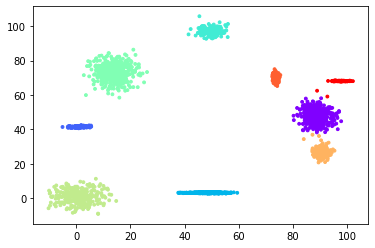

Best cluster number :  9  Best score :  0.8377446510558256
Runtime :  17677.19 ms


In [76]:
kMeans("2d-10c.arff")

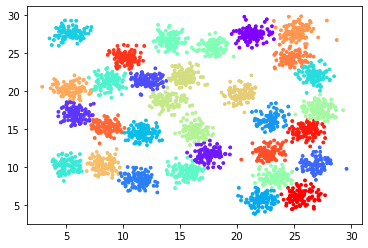

Best cluster number :  31  Best score :  0.5755530218165478
Runtime :  19416.04 ms


In [79]:
kMeans("D31.arff")

### 2.2 Limites de la méthode

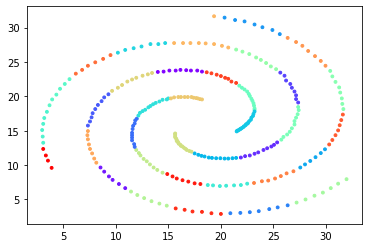

Best cluster number :  36  Best score :  0.48059839472504945
Runtime :  5003.61 ms


In [77]:
kMeans("3-spiral.arff")

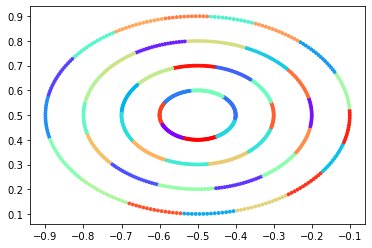

Best cluster number :  49  Best score :  0.47956329976161394
Runtime :  8044.46 ms


In [78]:
kMeans("dartboard1.arff")

# 3 Clustering agglomératif

In [114]:
def Agglomeratif(fileTestName,manieres):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,z) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    i_max = 0
    score_max = 0
    starttime = time.time()

    for i in range(2,50) :
        data_temp = new_data;
        kmeans = cluster.AgglomerativeClustering(n_clusters=i,linkage=manieres, affinity='euclidean').fit(data_temp)
        labels = kmeans.labels_
        score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
        if score > score_max :
            i_max = i
            score_max = score
    endtime = time.time()
    kmeans = cluster.AgglomerativeClustering(n_clusters=i_max,linkage=manieres, affinity='euclidean').fit(data_temp)
    labels = kmeans.labels_
    
    plt.scatter(x_list, y_list, c=labels,s=8,cmap="rainbow")
    plt.show()
    print("best cluster number : ",i_max, " best score : ",score_max)
    print("time execution : ", round((endtime - starttime)*1000,2),"ms")

### 3.1 Intérêts de la méthode

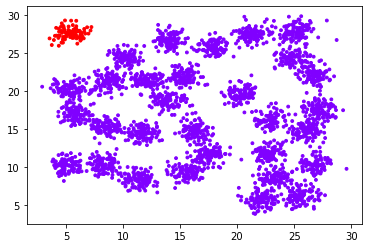

best cluster number :  2  best score :  0.23044322898606115
time execution :  11200.36 ms


In [115]:
Agglomeratif("D31.arff",'single')

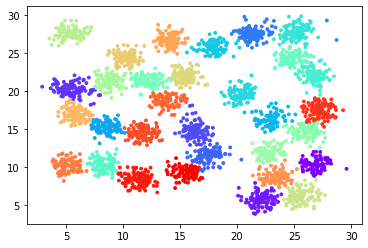

best cluster number :  32  best score :  0.5666400765005847
time execution :  15548.32 ms


In [131]:
Agglomeratif("D31.arff",'average')

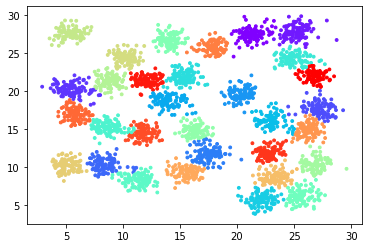

best cluster number :  31  best score :  0.5636664592980722
time execution :  15668.31 ms


In [132]:
Agglomeratif("D31.arff",'complete')

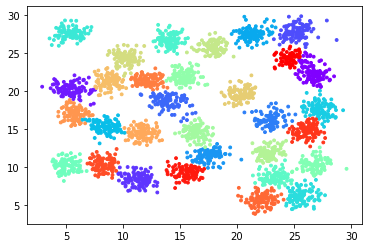

best cluster number :  31  best score :  0.5640591525907602
time execution :  16999.15 ms


In [133]:
Agglomeratif("D31.arff",'ward')

### 3.2 Limites de la méthode

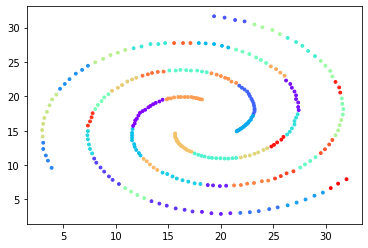

best cluster number :  48  best score :  0.4467478405947203
time execution :  265.29 ms


In [134]:
Agglomeratif("3-spiral.arff",'complete')

## 4 Clustering DBSCAN

In [116]:
def clusterDBSCAN(fileTestName,eps,min_samples):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,z) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    i_max = 0
    score_max = 0
    starttime = time.time()

    data_temp = new_data;
    kmeans = cluster.DBSCAN(eps = eps, min_samples = min_samples).fit(data_temp)
    labels = kmeans.labels_
    
   # score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
    endtime = time.time()
    
    plt.scatter(x_list, y_list, c=labels,s=8,cmap="rainbow")
    plt.show()
    #print("best cluster number : ",i_max, " best score : ",score_max)
    print("time execution : ", round((endtime - starttime)*1000,2),"ms")
    

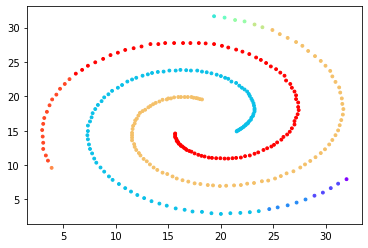

time execution :  1.99 ms


In [135]:
clusterDBSCAN("3-spiral.arff",1,1)

## 5 Clustering HDBSCAN

## 6 Synthèse

# Test

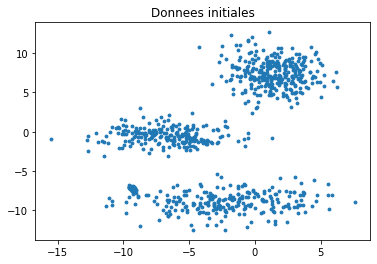

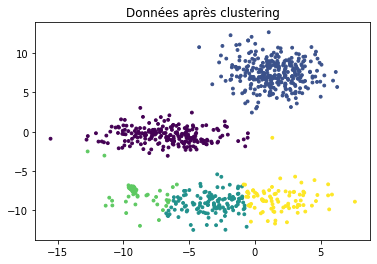

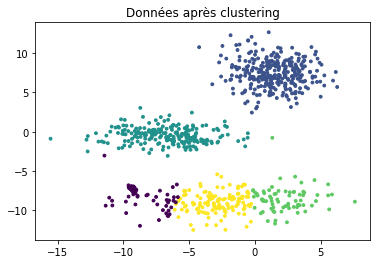

nb clusters = 5 , nb iter = 5 , runtime =  44.84 ms
Coefficient de silhouette :  0.6244728288101954
Indice de Davies Bouldin :  0.5571476235637851


In [44]:
# Parser un fichier de données au format arff
# Data est un tableau d'exemple avec pour chacun les valeurs des features
# Ex : [[-0.499261, -0.0612356], 
#       [-1.51369, 0.265446], 
#       [-1.60321, 0.362039], .....
#      ]
# Note : le jeu de données contient un num du cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
path = './artificial/'
databrut = arff.loadarff(open(path+"2d-4c-no9.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
#print(databrut)
#print(data)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261, -1.51369, -1.60321, ...]
# Ex pour f1 = [-0.0612356, 0.265446, 0.362039, ...]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

# #################################################
# Appel d'une méthode de clustering
cl_pred = cluster.KMeans(n_clusters=5, init='k-means++').fit_predict(data)
#print(cl_pred)

# Affichage en 2D avec une couleur pour chaque cluster
plt.scatter(f0, f1, c=cl_pred,s=8)
plt.title("Données après clustering")
plt.show()

# #################################################
# Variantes pour appel d'une méthode de clustering
k=5
tps1 = time.time()
model = cluster.KMeans(n_clusters=k, init='k-means++')
model.fit(data)
tps2 = time.time()
labels = model.labels_
# Nb iteration méthode
iteration = model.n_iter_

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering")
plt.show()
print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

# Metriques
silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
dbsc = metrics.davies_bouldin_score(data, model.labels_)
print("Coefficient de silhouette : ", silh)
print("Indice de Davies Bouldin : ", dbsc)

